<a href="https://colab.research.google.com/github/BHariKrishnaReddy/DataScience-Challeges/blob/master/eda_on_us_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on US Accidents(Kaggle)

## Downloading data sets through API

In [12]:
!pip3 install opendatasets --upgrade --quiet

In [13]:
import opendatasets as od
url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harikrishnareddyb
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 161MB/s]


## Data Preparation cleaning
1. Load dataset using Pandas
2. Get the insights of the data
3. Fix if the dataset have any missing values 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("/content/us-accidents/US_Accidents_Dec20_updated.csv")

In [18]:
print(df.shape)

(1516064, 47)


From this we can see this dataset have `1.5 million Records` and `49 columns`

In [20]:
print(df.dtypes) 
''' 
from this we can see there are many columns that their dtype has to be converted and group them accordingly

Start_Time, End_Time
'''

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [54]:
df.nunique()

ID                       1516064
Severity                       4
Start_Time               1037092
End_Time                 1161415
Start_Lat                 590611
Start_Lng                 603369
End_Lat                   587824
End_Lng                   599916
Distance(mi)               11514
Description               527655
Number                     37592
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity   

In [53]:
for i in df.columns:
  if df[i].nunique() <= 10:
    print(i)
    print("   Count of Unique values ",len(df[i].unique())," Unique value",df[i].unique())

Severity
   Count of Unique values  4  Unique value [3 2 4 1]
Side
   Count of Unique values  2  Unique value ['R' 'L']
Country
   Count of Unique values  1  Unique value ['US']
Timezone
   Count of Unique values  5  Unique value ['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
Amenity
   Count of Unique values  2  Unique value [False  True]
Bump
   Count of Unique values  2  Unique value [False  True]
Crossing
   Count of Unique values  2  Unique value [False  True]
Give_Way
   Count of Unique values  2  Unique value [False  True]
Junction
   Count of Unique values  2  Unique value [False  True]
No_Exit
   Count of Unique values  2  Unique value [False  True]
Railway
   Count of Unique values  2  Unique value [False  True]
Roundabout
   Count of Unique values  2  Unique value [False  True]
Station
   Count of Unique values  2  Unique value [False  True]
Stop
   Count of Unique values  2  Unique value [False  True]
Traffic_Calming
   Count of Unique values  2  Unique value [F

From the above data we can 
1. Drop Turning_Loop, Country -> it has only one value
2. In these columns we can perform `OneHotEncoding/LabelEncoding`
  >    Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal

  by making
  > True/Day , False/Night as 1 , 0 respectively
3. In these we can fill median of that column to remove missing values
  > Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight



In [24]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [22]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


describe will provide good insights of dataset columns

In [25]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

OMG there are mssing values we shall find out how much percentage it is

In [29]:
missingValueRatio = (df.isna().sum().sort_values(ascending = False) / len(df))*100
missingValueRatio

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
Amenity                   0.000000
Bump                      0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)        

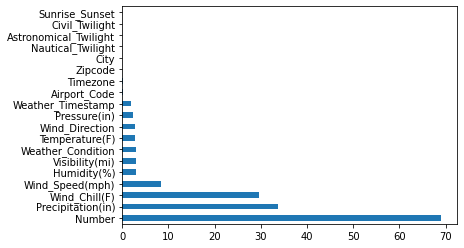

In [31]:
missingValueRatio[missingValueRatio > 0].plot(kind='barh')